In [1]:
#학습용, 검증용 분리
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [2]:
#데이터 전처리(정규화)
X_train = X_train.reshape(60000, 784).astype('float32') /255.0
X_test = X_test.reshape(10000, 784).astype('float32') / 255.0
print(y_train[:5])

[5 0 4 1 9]


In [3]:
#트리 모델 생성 및 학습
from sklearn.svm import SVC
model = SVC()
model.fit(X_train[:1000], y_train[:1000])
print("학습용:", model.score(X_train, y_train))
print("검증용:", model.score(X_test, y_test))

학습용: 0.9062833333333333
검증용: 0.9083


In [5]:
#최적의 C값과 gamma값 탐색
import numpy as np
train_rate = []
test_rate = []
c_values = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
g_values = [0.0001, 0.001, 0.01, 0.1]
for c in c_values:
    for g in g_values:
        model = SVC(C=c, gamma=g, random_state=10)
        model.fit(X_train[:1000], y_train[:1000])
        # 학습용 데이터셋의 정확도
        train_rate.append([c, g, model.score(X_train[:1000], y_train[:1000])])
        # 검증용 데이터셋의 정확도
        test_rate.append([c, g, model.score(X_test[:1000], y_test[:1000])])
train_arr = np.array(train_rate)
test_arr=np.array(test_rate)
# 가장 좋은 정확도
max_rate = np.max(test_arr[:, 2])
# 가장 성능이 좋은 인덱스
idx=np.where(test_arr[:, 2] == max_rate)[0][0]
print("최적의 c:", test_rate[idx][0])
print("최적의 gamma:", test_rate[idx][1])
print("최적의 정확도:", test_rate[idx][2])

최적의 c: 10
최적의 gamma: 0.01
최적의 정확도: 0.885


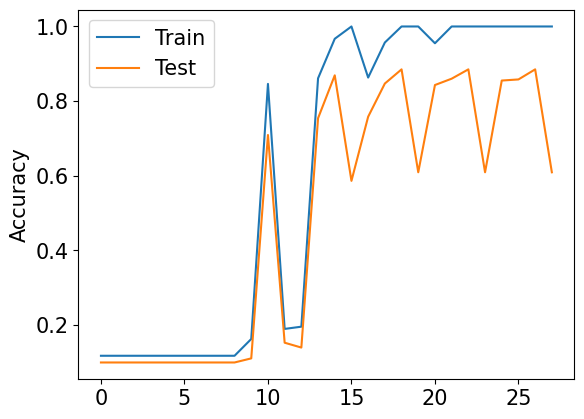

In [6]:
#시각화
import matplotlib.pyplot as plt
plt.rcParams["font.size"] = 15
plt.plot(range(len(train_rate)), train_arr[:, 2], label="Train")
plt.plot(range(len(test_rate)), test_arr[:, 2], label="Test")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [7]:
#최적의 c와 gamma적용
model = SVC(C=10, gamma=0.01)
model.fit(X_train[:1000], y_train[:1000])
print("학습용:", model.score(X_train, y_train))
print("검증용:", model.score(X_test, y_test))

학습용: 0.9108166666666667
검증용: 0.9126


In [8]:
#모형 저장
import pickle
pickle.dump(model, open('c:/data/mnist/mnist_svm.model', 'wb'))

In [9]:
# 모형 불러오기
model = pickle.load(open('c:/data/mnist/mnist_svm.model', 'rb'))
# 모형 사용
pred = model.predict(X_test[:10])
print('예측값:', pred[:10])
print('실제값:', y_test[:10])

예측값: [7 2 1 0 4 1 4 9 2 9]
실제값: [7 2 1 0 4 1 4 9 5 9]


In [10]:
#confusion matrix(혼동행렬, 오분류표) 출력
from sklearn.metrics import confusion_matrix
import pandas as pd
pred = model.predict(X_test)
cm = confusion_matrix(y_test, pred)
df_cm = pd.DataFrame(cm, index=range(10), columns=range(10))
df_cm

,0,1,2,3,4,5,6,7,8,9
0,958,0,3,0,5,4,6,2,2,0
1,0,1108,2,1,0,2,3,2,16,1
2,11,3,956,6,11,3,12,15,14,1
3,2,1,27,838,0,79,3,14,36,10
4,1,1,3,0,893,0,12,1,2,69
5,9,7,8,20,8,803,11,8,10,8
6,8,3,18,0,10,17,901,0,1,0
7,0,17,21,10,11,1,0,933,2,33
8,12,1,13,15,13,47,13,14,826,20
9,9,4,6,9,29,10,1,28,3,910


In [11]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96       980
           1       0.97      0.98      0.97      1135
           2       0.90      0.93      0.92      1032
           3       0.93      0.83      0.88      1010
           4       0.91      0.91      0.91       982
           5       0.83      0.90      0.86       892
           6       0.94      0.94      0.94       958
           7       0.92      0.91      0.91      1028
           8       0.91      0.85      0.88       974
           9       0.87      0.90      0.88      1009

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000

